In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

(250, 2)


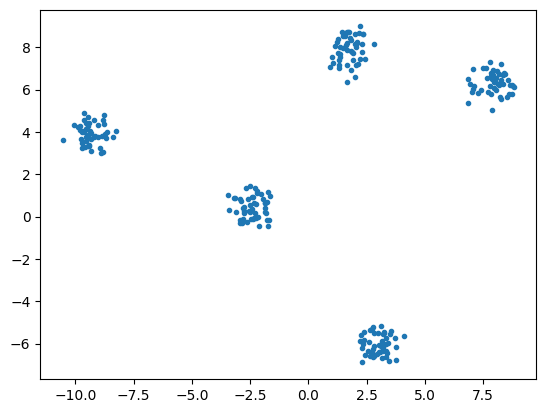

In [23]:
arr = np.loadtxt("../Datasets/Wellseparated.csv",delimiter=',')
print(arr.shape)
plt.plot(arr[:,0],arr[:,1],'.')

In [24]:
cluster_centres_list=[]
pt_label_list=[]
for j in range(2,10):
    kmeans = KMeans(n_clusters=j).fit(arr)
    cluster_centres = kmeans.cluster_centers_
    pt_label = kmeans.labels_
    cluster_centres_list.append(cluster_centres)
    pt_label_list.append(pt_label)

### Root-mean-square std dev

In [25]:
#𝑅𝑀𝑆𝑆𝑇𝐷. Follows elbow trend.
def RMSSTD(X1,cluster_centres_list,pt_label_list):
  for j in range(2,10):
    # kmeans = KMeans(n_clusters=j).fit(X1)
    # cluster_centres = kmeans.cluster_centers_
    # pt_label = kmeans.labels_
    ni_arr = np.zeros((j,1))
    var = 0
    for i in range(j):
      ni_arr[i] = np.count_nonzero(pt_label_list[j-2]==i)
      sum_ni = np.sum(ni_arr)
      var += (np.sum((X1[pt_label_list[j-2]==i]-cluster_centres_list[j-2][i])**2)/(2*sum_ni))
    𝑅𝑀𝑆𝑆𝑇𝐷 = var**(0.5)
    print('Number of Clusters:',j,' 𝑅𝑀𝑆𝑆𝑇𝐷:',𝑅𝑀𝑆𝑆𝑇𝐷)
  return

In [26]:
RMSSTD(arr,cluster_centres_list,pt_label_list)

Number of Clusters: 2  𝑅𝑀𝑆𝑆𝑇𝐷: 4.275476618144352
Number of Clusters: 3  𝑅𝑀𝑆𝑆𝑇𝐷: 2.9226997509547634
Number of Clusters: 4  𝑅𝑀𝑆𝑆𝑇𝐷: 1.9738292912788256
Number of Clusters: 5  𝑅𝑀𝑆𝑆𝑇𝐷: 0.7152825469581665
Number of Clusters: 6  𝑅𝑀𝑆𝑆𝑇𝐷: 0.7065070056617462
Number of Clusters: 7  𝑅𝑀𝑆𝑆𝑇𝐷: 0.6791743127679613
Number of Clusters: 8  𝑅𝑀𝑆𝑆𝑇𝐷: 0.6892316382229223
Number of Clusters: 9  𝑅𝑀𝑆𝑆𝑇𝐷: 0.6315675804839306


### R squared

In [27]:
def r_squared(arr,cluster_centres_list,pt_label_list):
    for j in range(2,10):
        # kmeans = KMeans(n_clusters=j).fit(arr)
        # cluster_centres = kmeans.cluster_centers_
        # sample_labels = kmeans.labels_
        data_centre = np.sum(arr,axis = 0)

        TSS = arr - data_centre
        TSS = np.sum(np.sum(TSS**2,axis = 1))

        SSE = 0
        labels_count = np.zeros(j)
        for i in range(j):
            SSE += np.sum((arr[pt_label_list[j-2] == i] - cluster_centres_list[j-2][i])**2) #(j-2) because j starts from 2 and index starts from 0

        RS = (TSS - SSE)/TSS
        print('Number of clusters:',j, 'RS: ',RS)
    return

In [28]:
r_squared(arr,cluster_centres_list,pt_label_list)

Number of clusters: 2 RS:  0.9999232122972692
Number of clusters: 3 RS:  0.9999730485347819
Number of clusters: 4 RS:  0.9999883359875482
Number of clusters: 5 RS:  0.9999988018474617
Number of clusters: 6 RS:  0.9999989465229575
Number of clusters: 7 RS:  0.9999990447509591
Number of clusters: 8 RS:  0.9999991400801487
Number of clusters: 9 RS:  0.9999992251076171


### Modified Hubert Γ statistic

In [36]:
# Modified hubert statistic
def modified_hubert_statistic(arr,cluster_centres_list,pt_label_list):
    n=arr.shape[0]
    for j in range(2,10):
        # kmeans = KMeans(n_clusters=j).fit(arr)
        # cluster_centres_list = kmeans.cluster_centers_
        # pt_label_list = kmeans.labels_#.reshape(arr.shape[0],1)
        # print(arr[pt_label==1])
        pt_dist = np.zeros((n,n))
        cl_dist = np.zeros((n,n))
        for i in range(n):
            #calculate distance of one point to all other points
            pt_dist[i] = np.sum((arr[i]-arr)**2,axis=1)
        #replace each point with its cluster
        arr1 = np.zeros(arr.shape)
        for i in range(j):
            arr1[pt_label_list[j-2]==i]=cluster_centres_list[j-2][i]
        for i in range(n):
            #calculate distance of one point's cluster to all other points' cluster
            cl_dist[i] = np.sum((arr1[i]-arr1)**2,axis=1)**0.5
        mod_hubert_stat = 2*np.sum(pt_dist*cl_dist)/(n*(n-1))
        print('Number of clusters:',j, 'Modified Hubert Statistic: ',mod_hubert_stat)
    return 

In [37]:
modified_hubert_statistic(arr,cluster_centres_list,pt_label_list)

Number of clusters: 2 Modified Hubert Statistic:  1823.017313555979
Number of clusters: 3 Modified Hubert Statistic:  2691.4770438309415
Number of clusters: 4 Modified Hubert Statistic:  3004.6743140453464
Number of clusters: 5 Modified Hubert Statistic:  3183.984777673449
Number of clusters: 6 Modified Hubert Statistic:  3186.577307262577
Number of clusters: 7 Modified Hubert Statistic:  3188.232447038702
Number of clusters: 8 Modified Hubert Statistic:  3190.468638301177
Number of clusters: 9 Modified Hubert Statistic:  3192.577267817099


### Calinski-Harabasz index

In [47]:
# Calinski-Harabasz index
def calinski_harabasz_index(arr,cluster_centres_list,pt_label_list):
    n=arr.shape[0]
    for j in range(2,10):
        #calculate distance between cluster centres and dataset cluster
        cluster_centres = cluster_centres_list[j-2]
        data_centre = np.sum(arr,axis = 0)/arr.shape[0]
        #distance between cluster centres and dataset centre
        dist_cc_dc = np.sum((cluster_centres - data_centre)**2,axis = 1)
        # print(dist_cc_dc)
        numerator = 0
        denominator = 0
        for i in range(j):
            #numerator
            num_pt = np.count_nonzero(pt_label_list[j-2]==i)
            numerator+=num_pt*dist_cc_dc[i]/(j-1)
            #denominator
            #distance between each point and its cluster centre
            dist_pt_cc = np.sum((arr[pt_label_list[j-2]==i]-cluster_centres[i])**2,axis = 1)
            denominator+=np.sum(dist_pt_cc)/(n-j)
        cal_har_index = numerator/denominator
        print('Number of clusters:',j, 'Calinski-Harabasz Index: ',cal_har_index)
    return    

In [48]:
calinski_harabasz_index(arr,cluster_centres_list,pt_label_list)

Number of clusters: 2 Calinski-Harabasz Index:  236.11372735695403
Number of clusters: 3 Calinski-Harabasz Index:  563.3659198999558
Number of clusters: 4 Calinski-Harabasz Index:  971.7880501336255
Number of clusters: 5 Calinski-Harabasz Index:  7601.442052469516
Number of clusters: 6 Calinski-Harabasz Index:  6894.759122307177
Number of clusters: 7 Calinski-Harabasz Index:  6316.258125749031
Number of clusters: 8 Calinski-Harabasz Index:  5991.6729980598975
Number of clusters: 9 Calinski-Harabasz Index:  5798.725783385461


### 𝐼 index

In [71]:
def I_index(arr,cluster_centres_list,pt_label_list):
    #distance between dataset centre and each point
    data_centre = np.sum(arr,axis = 0)/arr.shape[0]
    dist_dc_pt = np.sum((arr - data_centre)**2,axis = 1)**0.5
    sum_dist_dc_pt = np.sum(dist_dc_pt)
    print(sum_dist_dc_pt)
    #distance of clusters from each other
    for j in range(2,10):
        cluster_centres = cluster_centres_list[j-2]
        dist_cc = np.zeros((j,j))
        sum_dist_pt_cc=0
        for i in range(j):
            dist_cc[i] = np.sum((cluster_centres[i]-cluster_centres)**2,axis=1)**0.5
            #distance between point and its cluster centre
            dist_pt_cc = np.sum((arr[pt_label_list[j-2]==i]-cluster_centres[i])**2,axis = 1)**0.5
            #sum of all such distances
            sum_dist_pt_cc += np.sum(dist_pt_cc)
        max_sep = np.max(dist_cc)
        I = (sum_dist_dc_pt*max_sep/(j*sum_dist_pt_cc))**2
        print('Number of clusters:',j, 'I Index: ',I)
    return

In [72]:
I_index(arr,cluster_centres_list,pt_label_list)

1816.107152325697
Number of clusters: 2 I Index:  70.34444875677447
Number of clusters: 3 I Index:  116.99344432322151
Number of clusters: 4 I Index:  300.95766601761665
Number of clusters: 5 I Index:  1671.4015430472682
Number of clusters: 6 I Index:  1321.6622908474744
Number of clusters: 7 I Index:  1088.717156033241
Number of clusters: 8 I Index:  949.4037944839162
Number of clusters: 9 I Index:  843.7657768496916
